http://www.cs.toronto.edu/~tijmen/affNIST/

In [1]:
from lib import load_batch
b = load_batch(1)

In [2]:
b.image[0].shape

(40, 40)

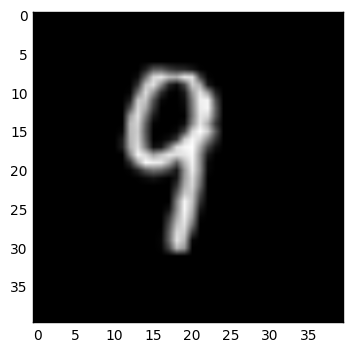

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.imshow(b.image[5], cmap='gray')

In [4]:
image = b.image.reshape(-1, 40, 40, 1)

In [5]:
from sklearn.model_selection import train_test_split

d = train_test_split(image, b.label_one_of_n, test_size=0.1, random_state=42)

In [17]:
from convnet import get_convnet_model
model = get_convnet_model()


(None, 40, 40, 1)
(None, 20, 20, 16)
(None, 20, 20, 16)
(None, 10, 10, 16)
(None, 10, 10, 16)
(None, 1, 1, 10)
(None, 10)


In [18]:
from lib import train_convnet
train_convnet(model, d, 1)

train convnet
54000 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
Epoch 1/1
54000/54000 [==============================] - 66s - loss: 1.3699 - acc: 0.5964       

In [20]:
from keras.metrics import categorical_accuracy
import tensorflow
# _, test_x, _, test_y = d
test_x, _, test_y, _ = d
test_x, test_y = test_x[0:1000], test_y[0:1000]
pred_y = model.predict(test_x)
with tensorflow.Session():
    acc = categorical_accuracy(tensorflow.convert_to_tensor(test_y), tensorflow.convert_to_tensor(pred_y)).eval()
print(acc)

0.49


In [19]:
print(test_y[3])
print(pred_y[3])

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.00104938  0.00104938  0.07745279  0.00345893  0.88439566  0.00104938
  0.00142686  0.00233072  0.010163    0.01762394]
